# Read Raw videos

### Description:
EVETAR sensor format: RG10 (RGGB 10 bits)

Each file has 47 frames, capturing the same static scene.

Lux small -> large: lowlight -> lowlight2 -> lowlight3 -> highlight


In [1]:
import numpy as np
import subprocess
import glob
import skimage.io as imio
import re
from skimage.color import rgb2gray
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from utils import *

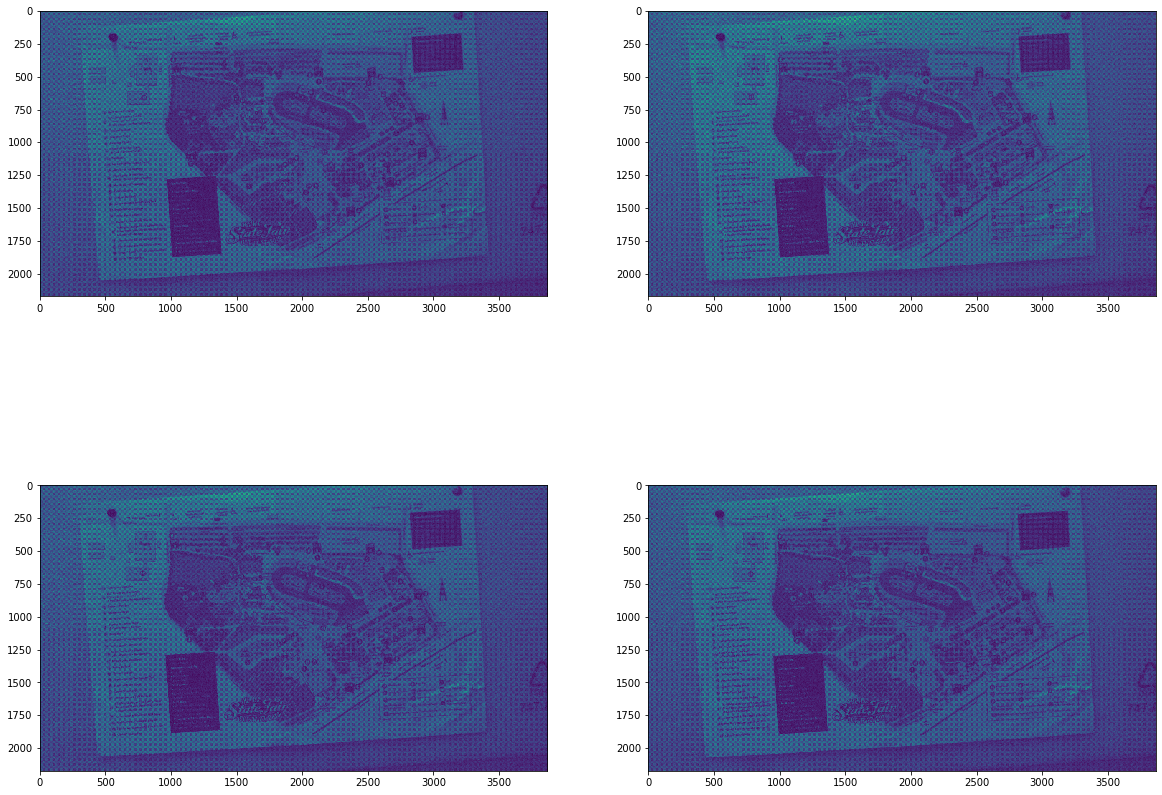

In [7]:
rIm=read_raw("lowlight3_frame47_tremor_rg10_2.raw", 
             frame = 47, rows=1087*2, runL=3968)

fig, ax = plt.subplots(2, 2, figsize=(20, 16))
ax[0][0].imshow(rIm[0])  # frame 0
ax[0][1].imshow(rIm[13]) # frame 14
ax[1][0].imshow(rIm[37]) # frame 37
ax[1][1].imshow(rIm[46]) # frame 46
plt.show()

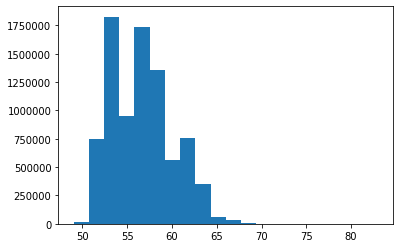

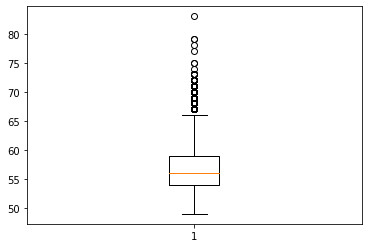

In [8]:
plt.hist(rIm[0].flatten(), bins = 20)
plt.show()
plt.boxplot(rIm[0].flatten())
plt.show()

In [9]:
print("rIm[0].max():", rIm[0].max(), "rIm[0].min():", rIm[0].min(),"rIm[0].mean():", rIm[0].mean())

rIm[0].max(): 83 rIm[0].min(): 49 rIm[0].mean(): 56.64097388485413


In [10]:
rIm[0][rIm[0] > 0].min()

49